In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import pandas as pd
from datetime import datetime
import re

In [34]:
def create_legend(lrs, clrs):
    legend_elements = []
    for c, lr in zip(clrs,lrs):
        legend_elements.append(Line2D([0], [0], color=c, lw=4, label='lr=' + lr))

    legend_elements.append(Line2D([0], [0], dashes=(2,1), lw=4, color='k', label='training'))
    legend_elements.append(Line2D([0], [0], lw=4, color='k', label='validation'))

    return legend_elements

In [63]:
def plot_tr_vs_val(lrs, hists, clrs, tr_key, val_key, title, splot, shared_ax, bottom, save):
    end = 100
    max_loss = 2

    if shared_ax is None:
        rv = plt.subplot(splot[0],splot[1],splot[2])
        plt.ylabel(tr_key)
    else:
        rv = plt.subplot(splot[0],splot[1],splot[2], sharey=shared_ax)
        plt.setp(rv.get_yticklabels(), visible=False)
        plt.subplots_adjust(wspace = .05)

    max_val = 0
    best_val_lr = 0
    max_tr = 0
    best_tr_lr = 0

    for c, lr, hist in zip(clrs,lrs,hists):

        if max_val < np.max(hist[val_key]):
            max_val = np.max(hist[val_key])
            best_val_lr = lr

        if max_tr < np.max(hist[tr_key]):
            max_tr = np.max(hist[tr_key])
            best_tr_lr = lr

        plt.plot(hist[tr_key][0:end], c +'--')
        plt.plot(hist[val_key][0:end], c+ '-')

    print("max for " + str(tr_key) + " " + str(max_tr) + " with lr=" + str(best_tr_lr))
    print("max for " + str(val_key) + " " + str(max_val) + " with lr=" + str(best_val_lr))
    plt.title(title)
    if (bottom):
        plt.xlabel('Epochs')
    else:
        plt.subplots_adjust(hspace = .2)
    
    if (tr_key.find('accuracy') != -1):
        ax = plt.gca()
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    else:
        plt.ylim([0,max_loss])

    return rv

In [33]:
def plot_training_multiple(file, title, save):

    run_folder = './saved_runs/'
    files = os.listdir(run_folder)

    age_hists = []
    gender_hists = []
    race_hists = []
    lrs = []
    lrre = re.compile('lr_\d+.\d+')

    found_age = False
    found_gender = False
    found_race = False
    
    
    for f in files:
        idx = f.find(file)
        if idx != -1:
            # lrs.append(lrre.search(f).group()[3:])
            hist = pd.read_csv(run_folder + f, index_col=0)
            hist = hist.to_dict('split')
            hist = dict(zip(hist['index'],hist['data']))
            age_idx = f.find(file + '_age')
            gender_idx = f.find(file + '_gender')
            race_idx = f.find(file + '_race')
            if age_idx != -1:
                found_age = True
                lrs.append(lrre.search(f).group()[3:])
                age_hists.append(hist)
            elif gender_idx != -1:
                found_gender = True
                gender_hists.append(hist)
            elif race_idx != -1:
                found_race = True
                race_hists.append(hist)
            else:
                found_age = True
                found_race = True
                age_hists.append(hist)
                race_hists.append(hist)
                return hist

    fig = plt.figure(figsize=(10,10))
    fig.suptitle(title)
    clrs = 'bgrcmykw'[0:len(lrs)]


    n_h_plots = found_age + found_gender + found_race
    cur_plot = 1
    # acc_ax = plt.subplot(231)
    # loss_ax = plt.subplot(234)
    if (found_age):
        print('plotting age')
        acc_ax = plot_tr_vs_val(lrs, age_hists, clrs, 'accuracy', 'val_accuracy',  'Age Accuracy', (2,n_h_plots,cur_plot), None, False, save)
        loss_ax = plot_tr_vs_val(lrs, age_hists, clrs, 'loss', 'val_loss', 'Age Loss', (2,n_h_plots,cur_plot + n_h_plots), None, True, save)
        cur_plot += 1

    if (found_gender):
        print('plotting gender')
        lg_ax = plot_tr_vs_val(lrs, gender_hists, clrs, 'accuracy', 'val_accuracy', 'Gender Accuracy', (2,n_h_plots,cur_plot), acc_ax, False, save)
        plot_tr_vs_val(lrs, gender_hists, clrs, 'loss', 'val_loss', 'Gender Loss', (2,n_h_plots,cur_plot + n_h_plots), loss_ax, True, save)
        cur_plot += 1

    if (found_race):
        print('plotting race')
        plot_tr_vs_val(lrs, race_hists, clrs, 'accuracy', 'val_accuracy', 'Race Accuracy', (2,n_h_plots,cur_plot), acc_ax, False, save)
        plot_tr_vs_val(lrs, race_hists, clrs, 'loss', 'val_loss', 'Race Loss', (2,n_h_plots,cur_plot + n_h_plots), loss_ax, True, save)
        cur_plot += 1
        
    # ax = plt.gca()
    lg_ax.legend(handles=create_legend(lrs, clrs),bbox_to_anchor=(-1., 1.02, 3., .5), loc='lower left',mode="expand",ncol=5,borderaxespad=2)

    
    if (save):
        plt.savefig('./saved_plots/archive/' + title + ' ' + str(datetime.now().strftime("%m-%d-%Y %H:%M:%S")) + '.png')
        plt.savefig('./saved_plots/' + title + '.png')

    plt.show()

SyntaxError: invalid syntax (<ipython-input-33-e5734427feaf>, line 27)

In [19]:
def plot_training_single(file, title):

    hist = pd.read_csv(file, index_col=0)
    hist = hist.to_dict('split')
    hist = dict(zip(hist['index'],hist['data']))

    plt.plot(hist['accuracy'],label='training')
    plt.plot(hist['val_accuracy'], label='validation')
    plt.legend()
    plt.title(title + ' Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.savefig('./saved_plots/' + title + '_Accuracy_' + str(datetime.now()) + '.png')
    plt.show()

    plt.plot(hist['loss'],label='training')
    plt.plot(hist['val_loss'], label='validation')
    plt.legend()
    plt.title(title + ' Loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.savefig('./saved_plots/' + title + '_Loss_' + str(datetime.now()) + '.png')
    plt.show()

plotting age
max for accuracy 0.7923199534416199 with lr=0.05
max for val_accuracy 0.4026839435100555 with lr=0.05
max for loss 1.8359631299972532 with lr=0.1
max for val_loss 3.0781373977661133 with lr=0.05
plotting gender
max for accuracy 0.9456100463867188 with lr=0.05
max for val_accuracy 0.7735074162483215 with lr=0.1
max for loss 0.6958133578300476 with lr=0.01
max for val_loss 1.0090235471725464 with lr=0.05
plotting race
max for accuracy 0.8521626591682434 with lr=0.1
max for val_accuracy 0.4593755602836609 with lr=0.01
max for loss 1.868269681930542 with lr=0.05
max for val_loss 3.0717427730560303 with lr=0.1


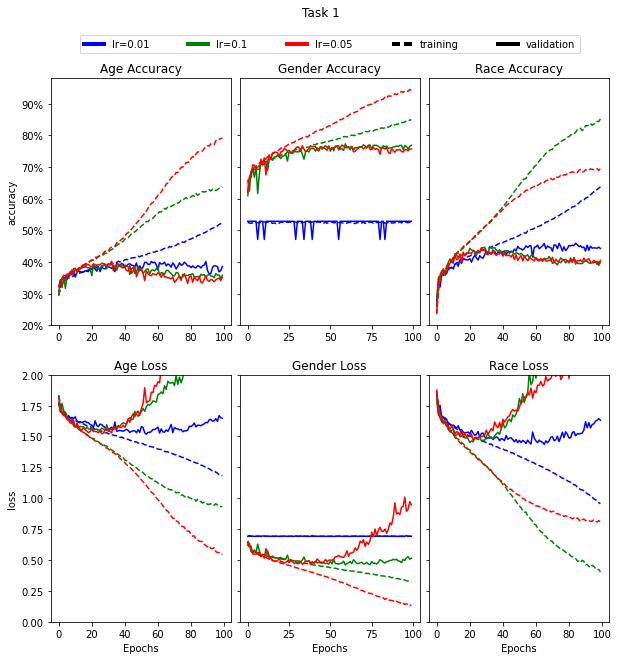

In [44]:
plot_training_multiple('Task_1', 'Task 1', save=False)

plotting age
max for accuracy 0.9989163279533386 with lr=0.01
max for val_accuracy 0.4329925179481506 with lr=0.01
max for loss 1.7867423295974731 with lr=0.01
max for val_loss 7.892380237579346 with lr=0.05
plotting gender
max for accuracy 0.999976933002472 with lr=0.01
max for val_accuracy 0.8087456822395325 with lr=0.01
max for loss 0.5999231338500977 with lr=0.01
max for val_loss 3.294203996658325 with lr=0.05
plotting race
max for accuracy 0.9997578859329224 with lr=0.1
max for val_accuracy 0.4935183525085449 with lr=0.1
max for loss 1.76362144947052 with lr=0.1
max for val_loss 8.578910827636719 with lr=0.05


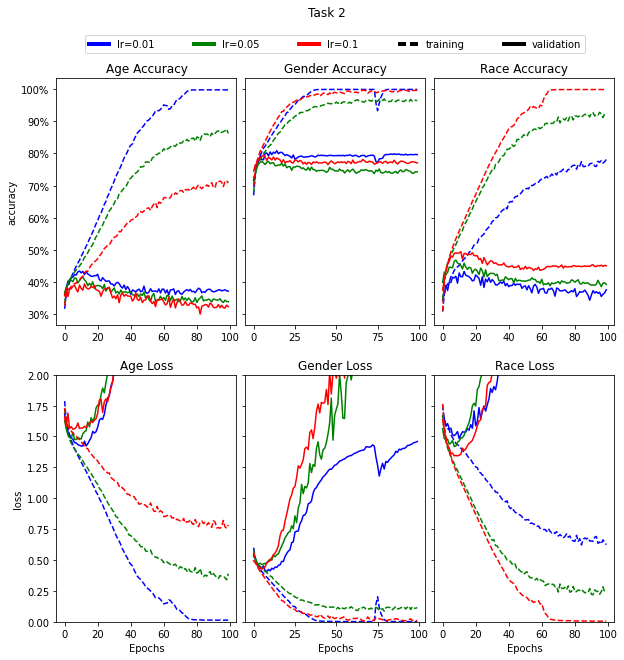

In [45]:
plot_training_multiple('task_2', 'Task 2', save=True)

plotting age
max for accuracy 0.9746610522270204 with lr=0.01
max for val_accuracy 0.4454993605613708 with lr=0.01
max for loss 1.8779460191726685 with lr=0.1
max for val_loss 8.209758758544922 with lr=0.01
plotting gender
max for accuracy 0.999976933002472 with lr=0.05
max for val_accuracy 0.8139492273330688 with lr=0.05
max for loss 0.6934256553649902 with lr=0.1
max for val_loss 1.9599180221557615 with lr=0.01
plotting race
max for accuracy 0.9817739725112916 with lr=0.01
max for val_accuracy 0.5015519261360168 with lr=0.01
max for loss 1.933991312980652 with lr=0.1
max for val_loss 7.967354774475098 with lr=0.01


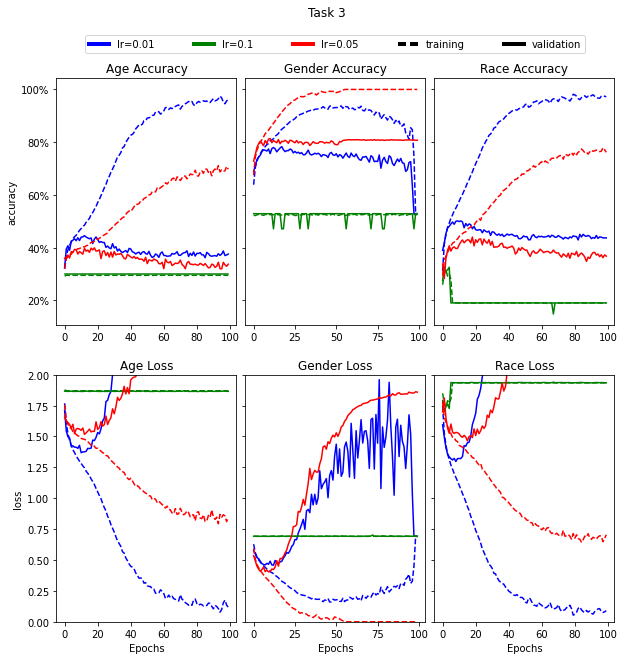

In [46]:
plot_training_multiple('task_3', 'Task 3', save=True)

In [61]:
def plot_training_4(file, title, save):
    run_folder = './saved_runs/'
    files = os.listdir(run_folder)

    age_hists = []
    gender_hists = []
    race_hists = []
    lrs = []
    lrre = re.compile('lr_\d+.\d+')

    for f in files:
        idx = f.find(file)
        if idx != -1:
            # lrs.append(lrre.search(f).group()[3:])
            hist = pd.read_csv(run_folder + f, index_col=0)
            hist = hist.to_dict('split')
            hist = dict(zip(hist['index'],hist['data']))
            lrs.append(lrre.search(f).group()[3:])
            age_hists.append(hist)
            race_hists.append(hist)

    fig = plt.figure(figsize=(10,10))
    fig.suptitle(title)
    clrs = 'bgrcmykw'[0:len(lrs)]


    n_h_plots = 2
    cur_plot = 1
    # acc_ax = plt.subplot(231)
    # loss_ax = plt.subplot(234)
    print('plotting age')
    lg_ax = acc_ax = plot_tr_vs_val(lrs, age_hists, clrs, 'age_accuracy', 'val_age_accuracy',  'Age Accuracy', (2,n_h_plots,cur_plot), None, False, save)
    loss_ax = plot_tr_vs_val(lrs, age_hists, clrs, 'age_loss', 'val_age_loss', 'Age Loss', (2,n_h_plots,cur_plot + n_h_plots), None, True, save)
    cur_plot += 1

    print('plotting race')
    plot_tr_vs_val(lrs, race_hists, clrs, 'race_accuracy', 'val_race_accuracy', 'Race Accuracy', (2,n_h_plots,cur_plot), acc_ax, False, save)
    plot_tr_vs_val(lrs, race_hists, clrs, 'race_loss', 'val_race_loss', 'Race Loss', (2,n_h_plots,cur_plot + n_h_plots), loss_ax, True, save)
    cur_plot += 1
        
    # ax = plt.gca()
    lg_ax.legend(handles=create_legend(lrs, clrs),bbox_to_anchor=(0., 1.02, 2., .5), loc='lower left',mode="expand",ncol=5,borderaxespad=2)

    
    if (save):
        plt.savefig('./saved_plots/archive/' + title + ' ' + str(datetime.now().strftime("%m-%d-%Y %H:%M:%S")) + '.png')
        plt.savefig('./saved_plots/' + title + '.png')

    plt.show()


plotting age
max for age_accuracy 0.5603845715522766 with lr=0.05
max for val_age_accuracy 0.3856125473976135 with lr=0.05
max for age_loss 1.7940738201141355 with lr=0.05
max for val_age_loss 2.533803224563598 with lr=0.05
plotting race
max for race_accuracy 0.6301991939544678 with lr=0.05
max for val_race_accuracy 0.4142778813838959 with lr=0.05
max for race_loss 1.819750189781189 with lr=0.05
max for val_race_loss 2.545615196228028 with lr=0.05


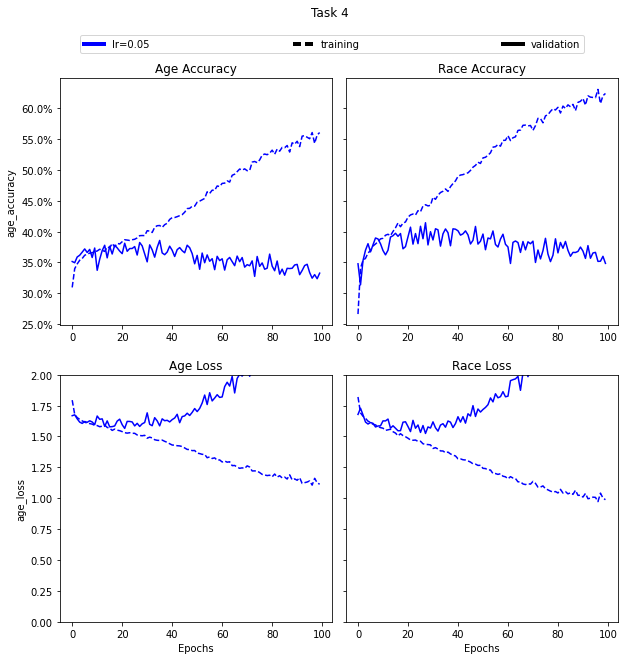

In [64]:
plot_training_4('task_4', 'Task 4', save = False)